<a href="https://colab.research.google.com/github/sandeeppalakkal/ML_Datascience_Practice/blob/master/CIFAR10_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10 Dataset

In [2]:
# Load CIFAR-10
import keras
from keras.datasets import cifar10
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 46s 0us/step


In [3]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
img = X_train[0,...]
type(img)

numpy.ndarray

In [0]:
import numpy as np
num_classes = len(np.unique(y_train))
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [0]:
import matplotlib.pyplot as plt
from scipy.misc import toimage
from PIL import Image

In [0]:
def display_image(X,start=0,jump=1,row=4):
  end = start + jump * row
  fig = plt.figure(figsize=(10,10))
  
  k = start
  for i in range(start,end,jump):
    for j in range(start,end,jump):
      ax = fig.add_subplot(row,row,k+1,xticks=[],yticks=[])
      #plt.imshow(Image.fromarray(X[k]))
      plt.imshow(X[k])
      k += jump
  plt.show()
  return

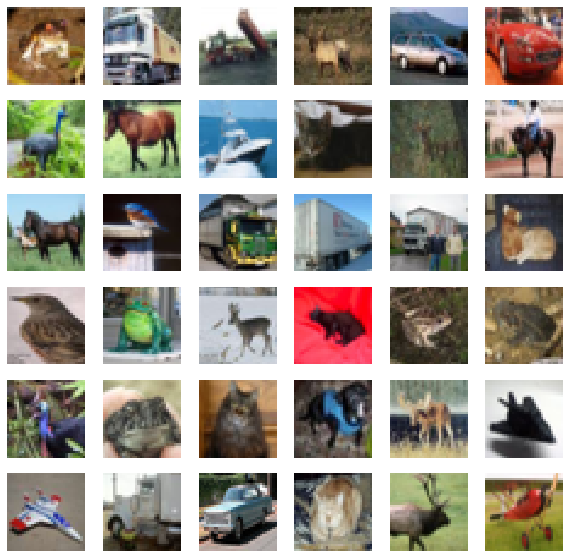

In [9]:
display_image(X_train,0,1,6)

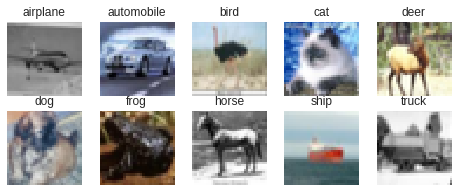

In [10]:
import numpy as np
num_classes = 10
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num,::]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

# Define CNN Model

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D

In [0]:
# model definition
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

# Data Preparation

In [0]:
# target from numbers to binary
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [0]:
# data normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /=255

In [16]:
X_train.dtype

dtype('float32')

# Model Training

In [0]:
# optimizer: rms prop
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# model compile
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [0]:
batch_size = 32
epochs = 100

In [0]:
model.fit(X_train,y_train,
         batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 22s 445us/step - loss: 0.9116 - acc: 0.6833 - val_loss: 0.8810 - val_acc: 0.6892
Epoch 2/100
50000/50000 [==============================] - 22s 447us/step - loss: 0.8851 - acc: 0.6911 - val_loss: 0.8450 - val_acc: 0.7096
Epoch 3/100
50000/50000 [==============================] - 22s 445us/step - loss: 0.8616 - acc: 0.7016 - val_loss: 0.8784 - val_acc: 0.7001
Epoch 4/100
50000/50000 [==============================] - 22s 442us/step - loss: 0.8361 - acc: 0.7082 - val_loss: 0.8209 - val_acc: 0.7145
Epoch 5/100
50000/50000 [==============================] - 22s 446us/step - loss: 0.8194 - acc: 0.7163 - val_loss: 0.7875 - val_acc: 0.7255
Epoch 6/100
50000/50000 [==============================] - 22s 447us/step - loss: 0.8011 - acc: 0.7208 - val_loss: 0.7909 - val_acc: 0.7219
Epoch 7/100
50000/50000 [==============================] - 22s 442us/step - loss: 0.7875 - acc: 0.7274 - val_l

In [0]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [0]:
# plot accuracy & loss curve
def plot_training_curves(model)
  fig,axes = plt.subplots(1,2)
  axes[0].plot(model.history.history['acc'],'r',label='Training set')
  axes[0].plot(model.history.history['val_acc'],'g',label='Test set')
  axes[0].ylabel("Accuracy")
  axes[0].xlabel("Epochs")
  axes[0].legend(loc='best')

  axes[1].plot(model.history.history['loss'],'r',label='Training set')
  axes[1].plot(model.history.history['val_loss'],'g',label='Test set')
  axes[1].ylabel("Loss")
  axes[0].xlabel("Epochs")
  axes[1].legend(loc='best')
  plt.show()